<a href="https://colab.research.google.com/github/GeorgeGlennon/Part-II-Chemistry-Programming/blob/Exercise-3/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convergence was reached after 11427 iterations in 28.19520139694214 seconds.



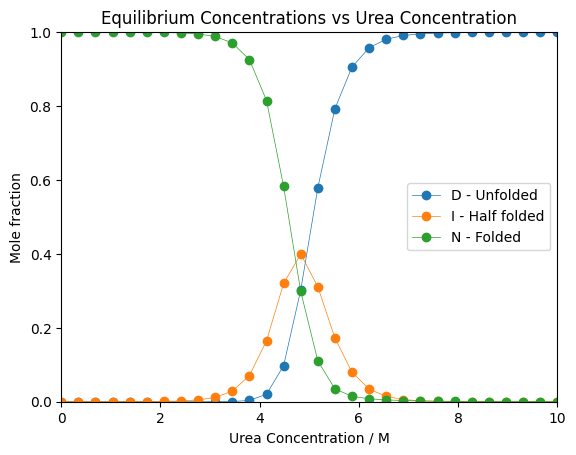

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

Concentrations = {
    "D": 0.4,
    "I": 0.3,
    "N": 0.3
}

TempConc = {
    "D": 0,
    "I": 0,
    "N": 0
}

Timestep = 6*10**-6

def I(D, I, N, C, T, exp_095, exp_n168, exp_n172, exp_12):
    """Function that evolves concentration of I"""
    grad = (-0.06 * I * exp_095) + (26000 * D * exp_n168) + (-730 * I * exp_n172) + (7.5e-4 * N * exp_12)
    return I + (grad * T), grad

def D(D, I, C, T, exp_095, exp_n168):
    """Function that evolves concentration of D"""
    grad = (-26000 * D * exp_n168) + (0.06 * I * exp_095)
    return D + (grad * T), grad

def N(I, N, C, T, exp_n172, exp_12):
    """Function that evolves concentration of N"""
    grad = (+730 * I * exp_n172) + (-7.5e-4 * N * exp_12)
    return N + (grad * T), grad

def itterator(Urea, Concentrations, Timestep):
    """Function that iterates through timestep chnages of concentraions until convergence"""
    gradient = 1
    n = 0

    # Precompute exponentials
    exp_095 = np.exp(0.95 * Urea)
    exp_n168 = np.exp(-1.68 * Urea)
    exp_n172 = np.exp(-1.72 * Urea)
    exp_12 = np.exp(1.2 * Urea)

    while gradient > 1 * 10**-2:
        TempConc["I"], gradI = I(Concentrations["D"], Concentrations["I"], Concentrations["N"], Urea, Timestep, exp_095, exp_n168, exp_n172, exp_12)
        TempConc["D"], gradD = D(Concentrations["D"], Concentrations["I"], Urea, Timestep, exp_095, exp_n168)
        TempConc["N"], gradN = N(Concentrations["I"], Concentrations["N"], Urea, Timestep, exp_n172, exp_12)
        Concentrations = TempConc.copy()
        gradient = max([abs(gradI), abs(gradD), abs(gradN)])
        n = n + 1

    return Concentrations, n

urea_vals = np.linspace(0, 10, 30)
D_vals = []
I_vals = []
N_vals = []

for n in urea_vals:
    values, n = itterator(n, Concentrations, Timestep)
    D_vals.append(values["D"])
    N_vals.append(values["N"])
    I_vals.append(values["I"])

print("Convergence was reached after", n, "iterations in", time.time() - start, "seconds.\n")

# Plot results
plt.plot(urea_vals, D_vals, linewidth=0.5, marker='o', label="D - Unfolded")
plt.plot(urea_vals, I_vals, linewidth=0.5, marker='o', label="I - Half folded")
plt.plot(urea_vals, N_vals, linewidth=0.5, marker='o', label="N - Folded")
plt.legend(loc = 'center right')
plt.xlim(0,10)
plt.ylim(0,1)
plt.xlabel("Urea Concentration / M")
plt.ylabel("Mole fraction")
plt.title("Equilibrium Concentrations vs Urea Concentration")
plt.show()
